<a href="https://colab.research.google.com/github/Sivasurya-J/DataScienceAcademicProjects/blob/main/SimpleLinearRegression_CaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the Data**

In [1]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [2]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
california.data.shape

(20640, 8)

In [4]:
california.target.shape

(20640,)

In [5]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

**Exploring the Data**

In [6]:
import pandas as pd
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

In [7]:
california_df = pd.DataFrame(california.data, columns = california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)

In [8]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [9]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


**Visualizing the Data**

In [10]:
sample_df = california_df.sample(frac=0.1, random_state=17)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

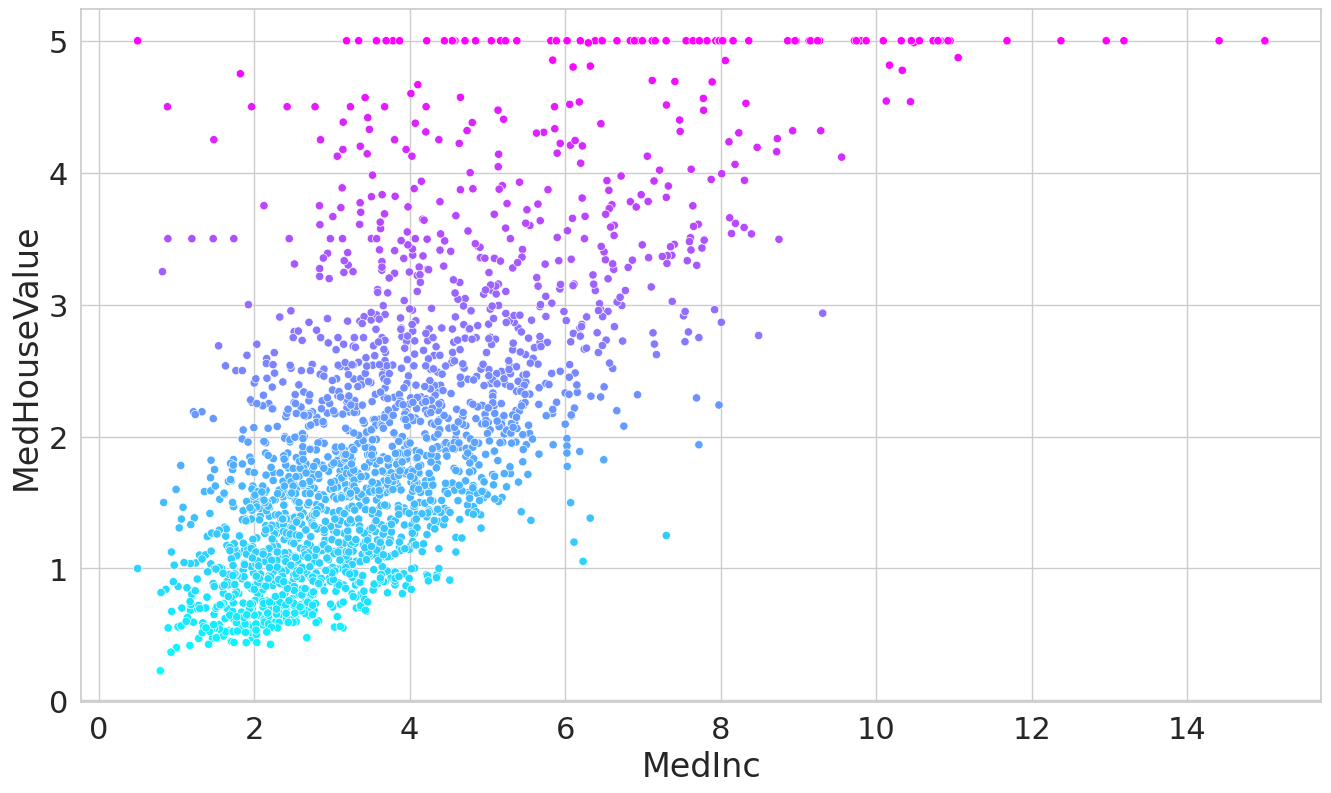

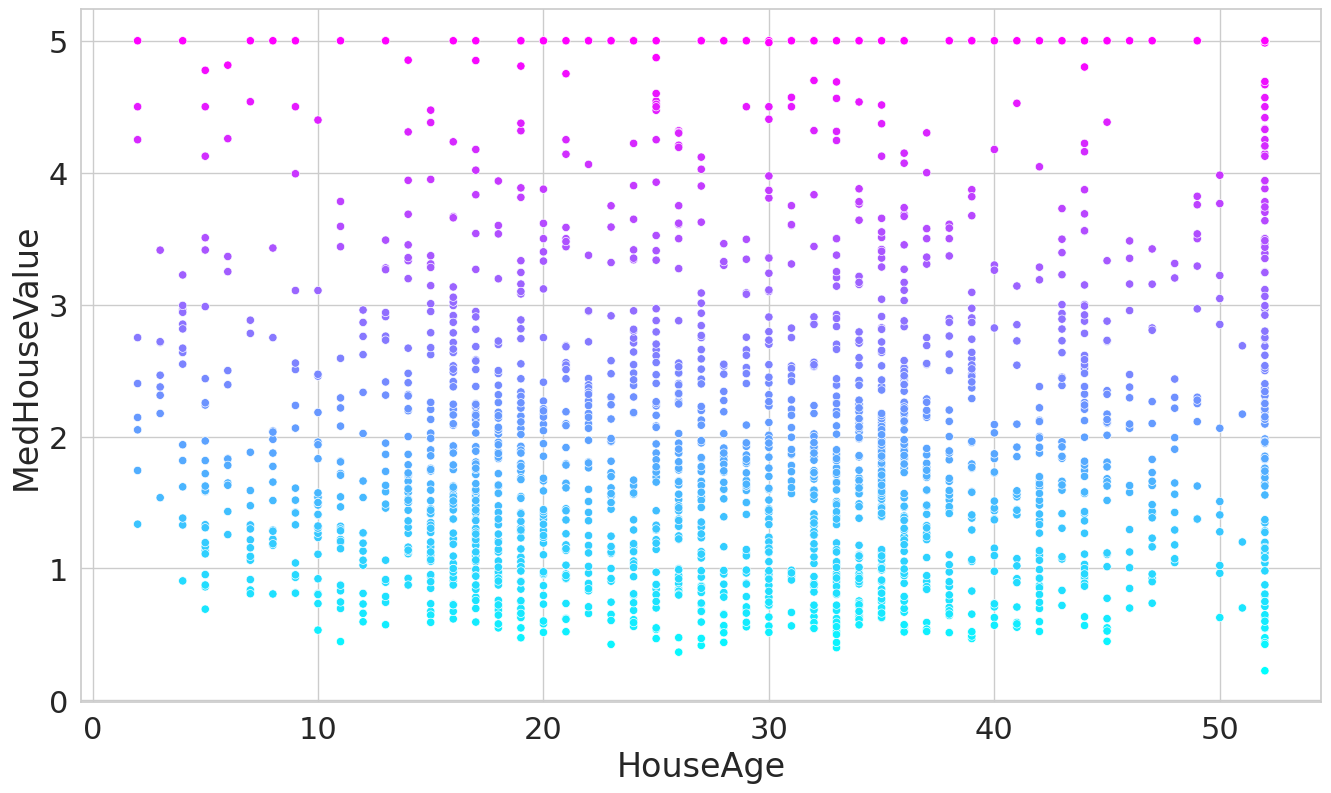

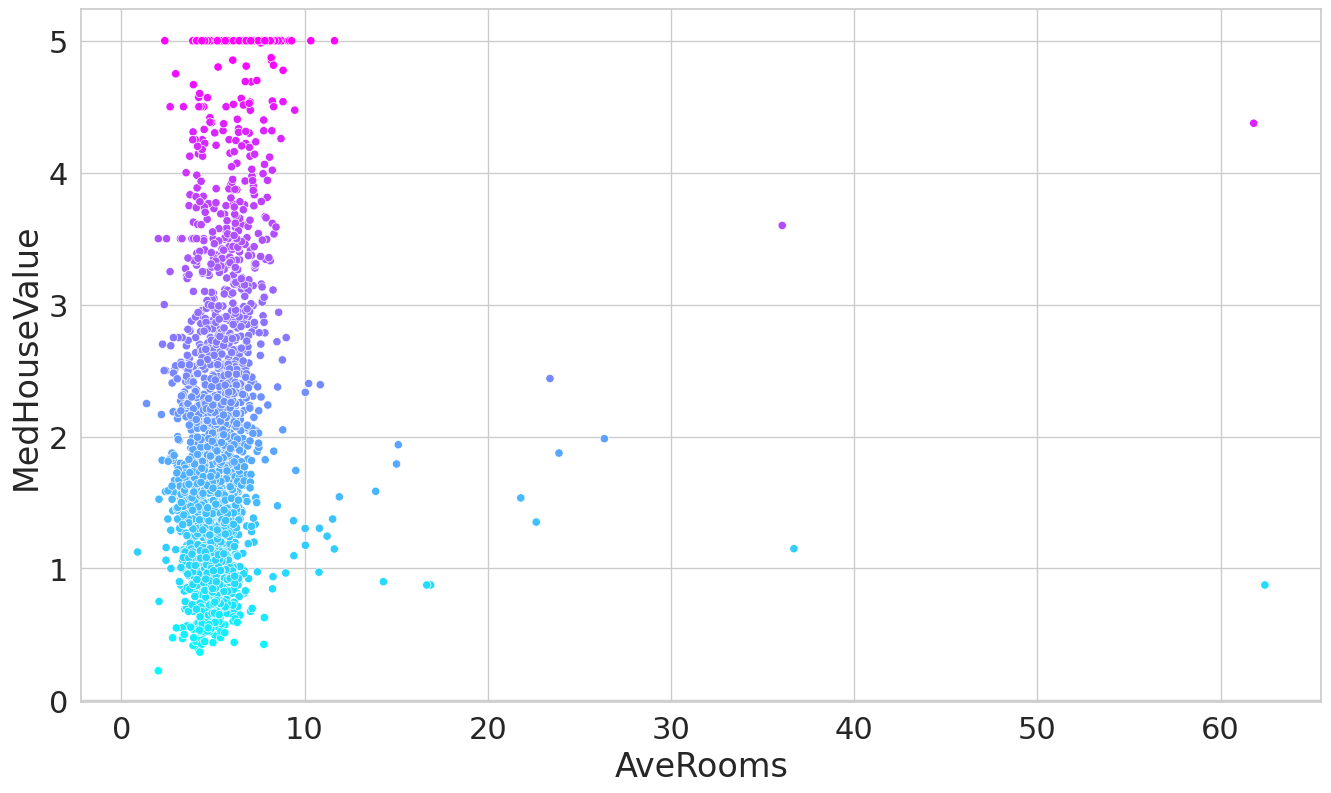

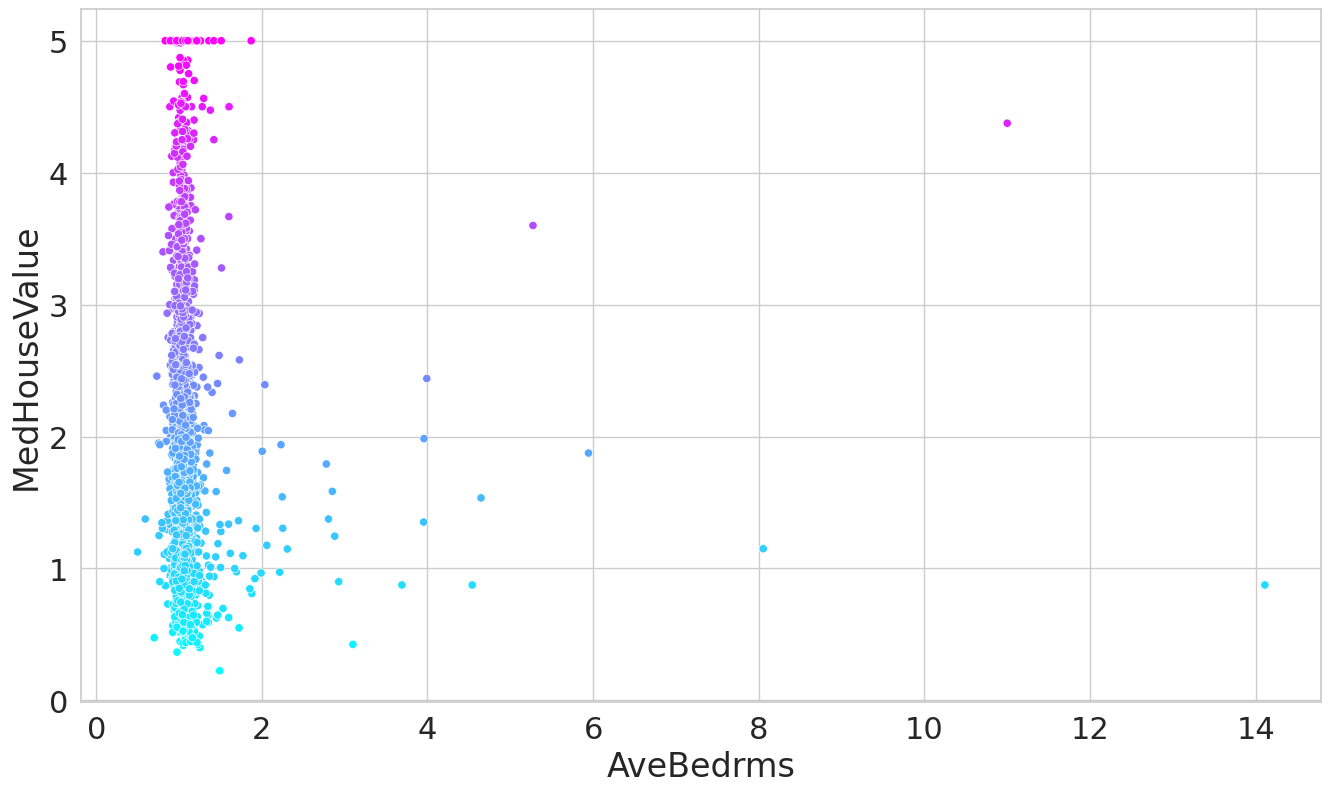

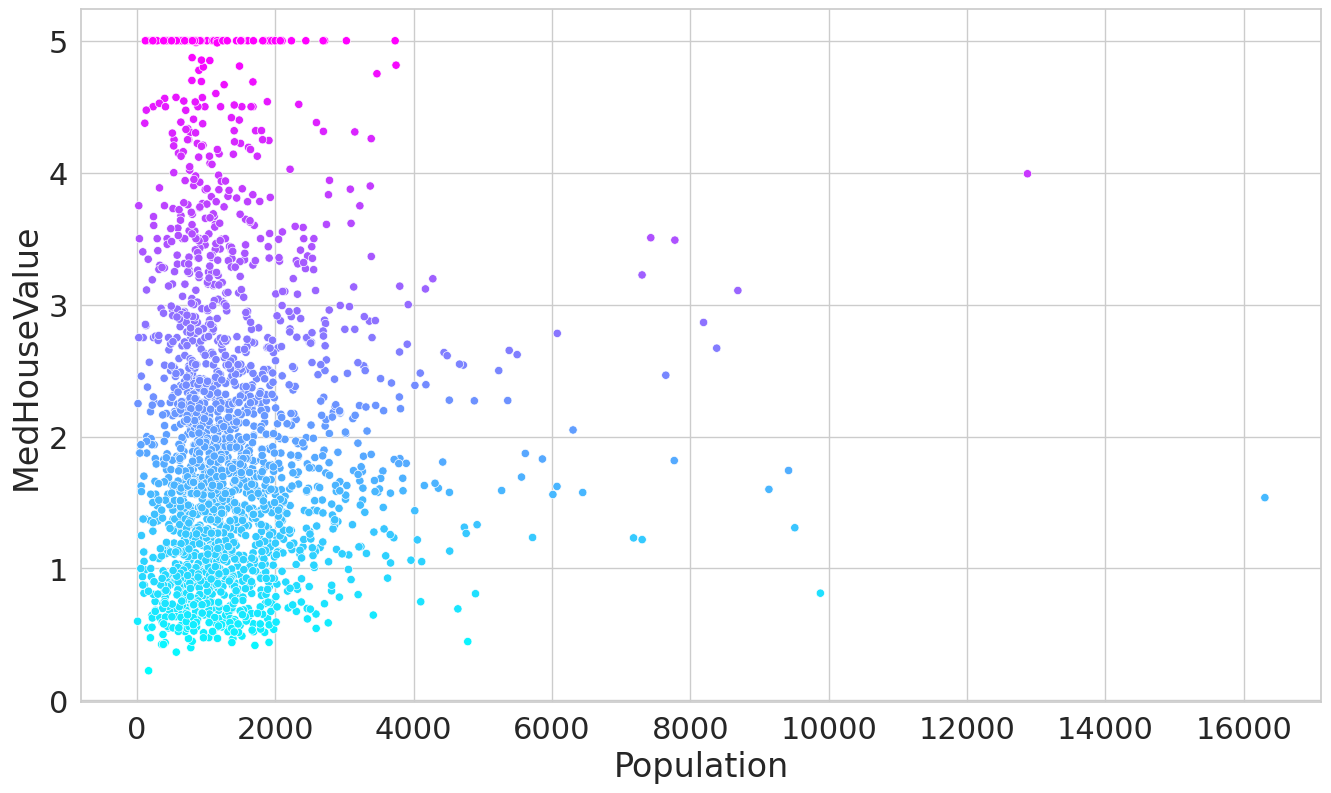

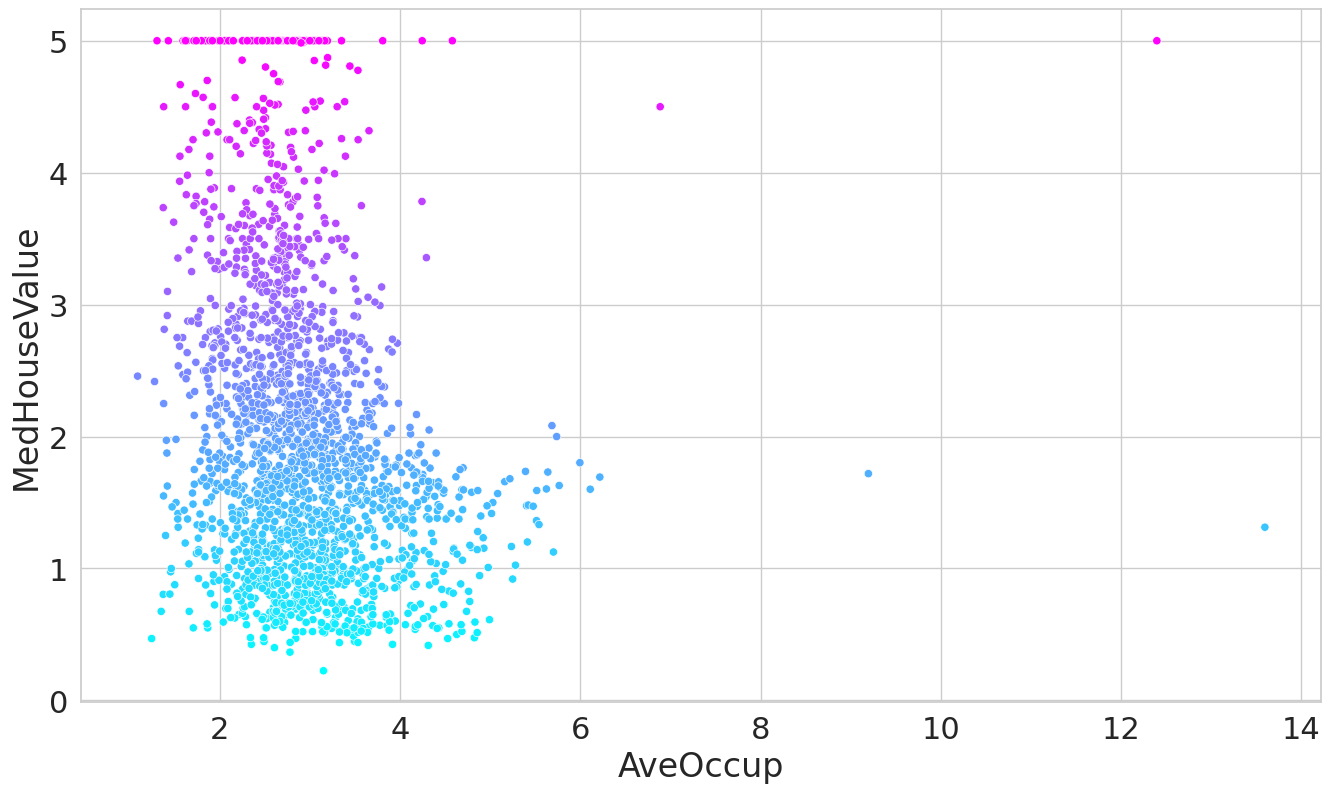

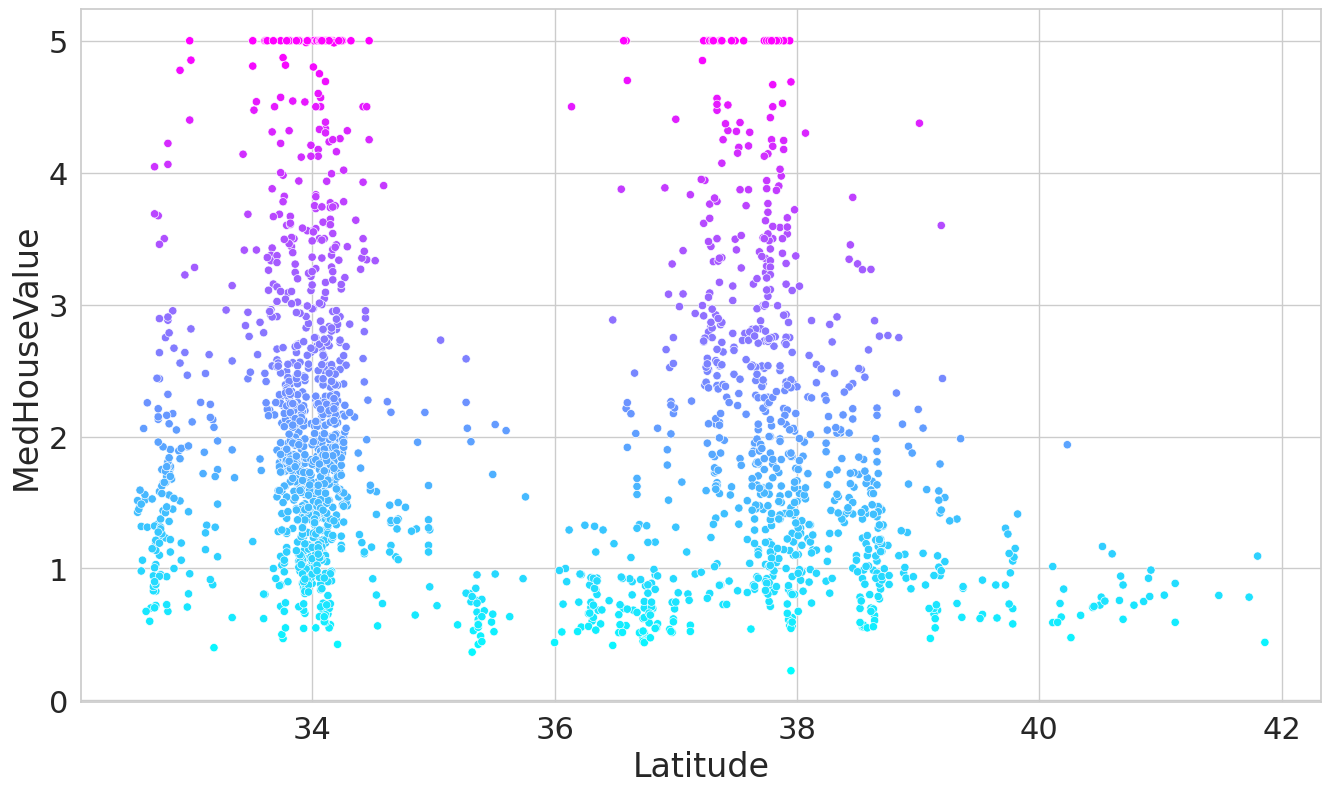

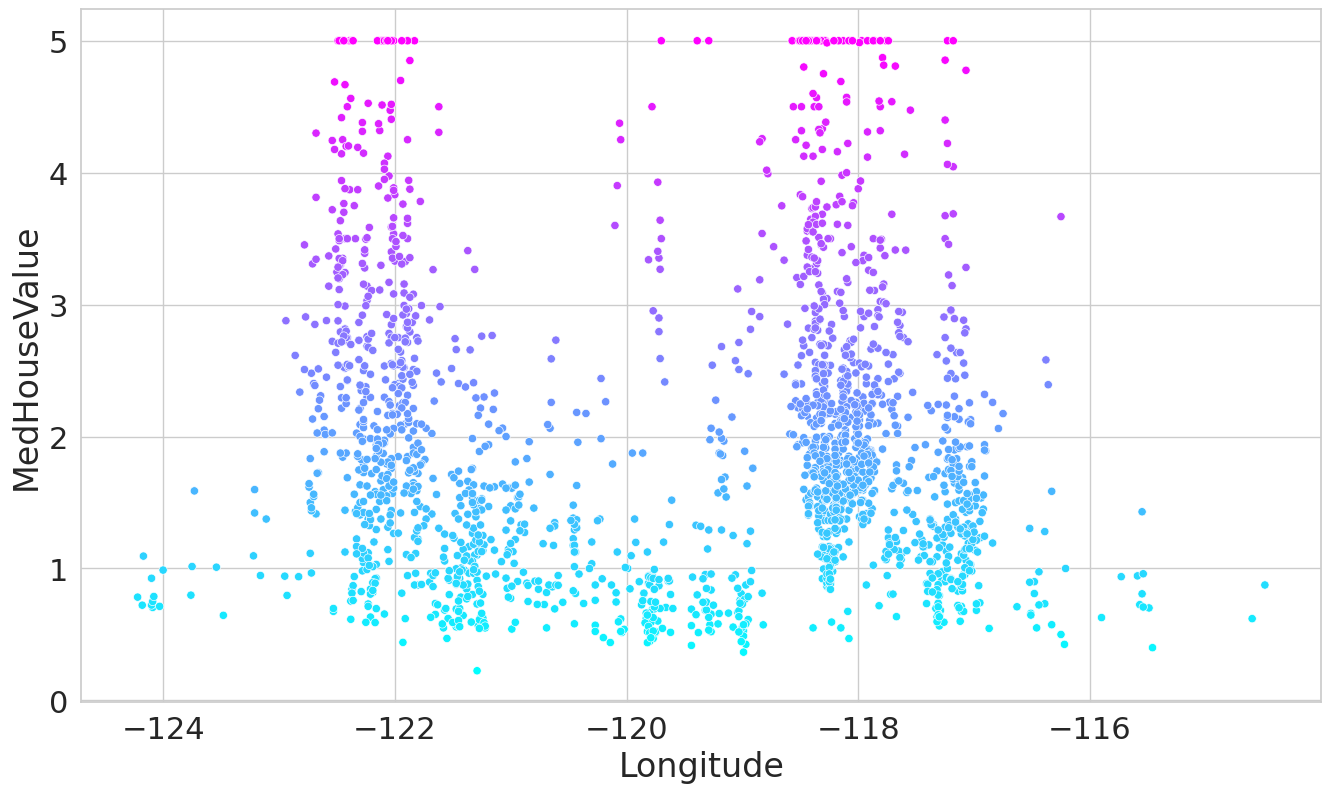

In [12]:
for feature in california.feature_names:
  plt.figure(figsize=(16,9))
  sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)

**Splitting Dataset to Train and Test**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)
X_train.shape, X_test.shape

((15480, 8), (5160, 8))

**Training the Model**

In [14]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [15]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [16]:
for i, name in enumerate(california.feature_names):
  print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.4377030215382206
  HouseAge: 0.009216834565797749
  AveRooms: -0.10732526637360926
 AveBedrms: 0.6117133073918087
Population: -5.756822009275742e-06
  AveOccup: -0.003384566465716442
  Latitude: -0.4194818609649067
 Longitude: -0.4337713349874023


**Model Testing**

In [17]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [18]:
predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [19]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

**Visualization of Expected vs Predicted**

In [20]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

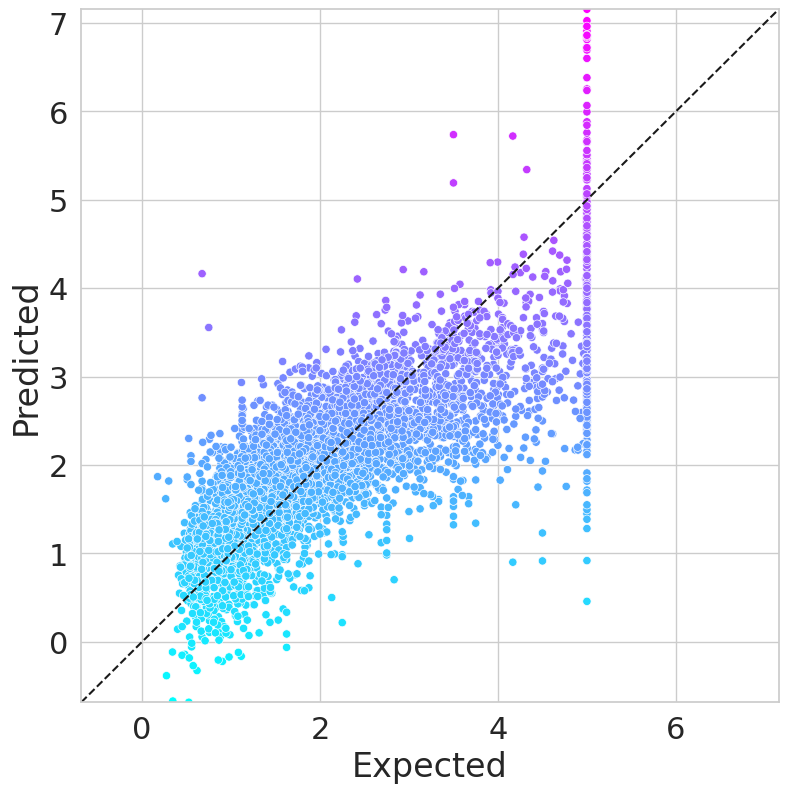

In [21]:
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

**Calculating Metrics**

In [22]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.6008983115964333

In [23]:
metrics.mean_squared_error(expected, predicted)

0.5350149774449117

**Choosing the Best Model**

In [24]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {
    'LinearRegression': linear_regression,
    'Elasticnet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [25]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=california.data, y=california.target, cv=kfold, scoring='r2')
  print(f'{estimator_name:>16}: '+
        f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      Elasticnet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599
